In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import dataframe_image as dfi

from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

C:\Users\ABCD\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [13]:
#df=pd.read_csv('EPL_GW4_standard.csv')
df=pd.read_csv('EPL_result.csv')

#Name to abbreviation
team_abb={'Everton':'EVE', 'Aston Villa':'AVL',
          'Leicester City':'LEI', 'Arsenal':'ARS',
          'Liverpool':'LIV','Tottenham':'TOT', 
          'Chelsea':'CHE', 'Leeds United':'LEE', 
          'Newcastle Utd':'NEW','West Ham':'WHU', 
          'Southampton':'SOU', 'Crystal Palace':'CRY', 
          'Wolves':'WOL','Manchester City':'MCI', 
          'Brighton':'BHA', 'Manchester Utd':'MUN', 
          'West Brom':'WBA','Burnley':'BUR', 
          'Sheffield Utd':'SHU', 'Fulham':'FUL'}
df.Home=df.Home.apply(lambda x: team_abb[x])
df.Away=df.Away.apply(lambda x: team_abb[x])

df['GD']=df.G_Home-df.G_Away
df['Pts_Home']=df.GD.apply(lambda x : 3 if x>0 else (0 if x<0 else 1))
df['Pts_Away']=df.GD.apply(lambda x : 0 if x>0 else (3 if x<0 else 1))
df.head()

,GW,Home,Away,xG_Home,xG_Away,G_Home,G_Away,GD,Pts_Home,Pts_Away
0,1,FUL,ARS,0.2,1.8,0.0,3.0,-3.0,0,3
1,1,CRY,SOU,0.7,0.8,1.0,0.0,1.0,3,0
2,1,LIV,LEE,3.3,0.6,4.0,3.0,1.0,3,0
3,1,WHU,NEW,1.1,1.5,0.0,2.0,-2.0,0,3
4,1,WBA,LEI,0.5,2.2,0.0,3.0,-3.0,0,3


In [14]:
gw_last=21
gw_next=gw_last+1

In [15]:
df_temp=pd.DataFrame({'Team':list(team_abb.values())})
df_temp['M_h']=df_temp.Team\
.apply(lambda x:df[df.Home==x][df.GW<gw_next].count()[0])

df_temp['M_a']=df_temp.Team\
.apply(lambda x:df[df.Away==x][df.GW<gw_next].count()[0])

df_temp['M']=df_temp.M_h+df_temp.M_a

df_temp['xG_h']=df_temp.Team\
.apply(lambda x:df.xG_Home[df.Home==x][df.GW<gw_next].sum())

df_temp['xG_a']=df_temp.Team\
.apply(lambda x:df.xG_Away[df.Away==x][df.GW<gw_next].sum())

df_temp['xG']=df_temp.xG_a+df_temp.xG_h

df_temp['xGpm_h']=df_temp.xG_h/df_temp.M_h
df_temp['xGpm_a']=df_temp.xG_a/df_temp.M_a
df_temp['xGpm']=df_temp.xG/df_temp.M

df_temp['xGA_h']=df_temp.Team\
.apply(lambda x:df.xG_Away[df.Home==x][df.GW<gw_next].sum())

df_temp['xGA_a']=df_temp.Team\
.apply(lambda x:df.xG_Home[df.Away==x][df.GW<gw_next].sum())

df_temp['xGA']=df_temp.xGA_a+df_temp.xGA_h

df_temp['xGApm_h']=df_temp.xGA_h/df_temp.M_h
df_temp['xGApm_a']=df_temp.xGA_a/df_temp.M_a
df_temp['xGApm']=df_temp.xGA/df_temp.M

df_temp['delta_xGpm']=df_temp.xGpm-df_temp.xGApm


df_temp['P_h']=df_temp.Team\
.apply(lambda x:df.Pts_Home[df.Home==x][df.GW<gw_next].sum())

df_temp['P_a']=df_temp.Team\
.apply(lambda x:df.Pts_Away[df.Away==x][df.GW<gw_next].sum())

df_temp['P']=df_temp.P_a+df_temp.P_h

df_temp['Ppm_h']=df_temp.P_h/df_temp.M_h
df_temp['Ppm_a']=df_temp.P_a/df_temp.M_a
df_temp['Ppm']=df_temp.P/df_temp.M

df_temp['G_h']=df_temp.Team\
.apply(lambda x:df.G_Home[df.Home==x][df.GW<gw_next].sum())

df_temp['G_a']=df_temp.Team\
.apply(lambda x:df.G_Away[df.Away==x][df.GW<gw_next].sum())

df_temp['G']=df_temp.G_a+df_temp.G_h

df_temp['GA_h']=df_temp.Team\
.apply(lambda x:df.G_Away[df.Home==x][df.GW<gw_next].sum())

df_temp['GA_a']=df_temp.Team\
.apply(lambda x:df.G_Home[df.Away==x][df.GW<gw_next].sum())

df_temp['GA']=df_temp.GA_a+df_temp.GA_h

df_temp['GD']=df_temp.G-df_temp.GA

In [16]:
df_styled=df_temp[['Team','M','P','GD','G','GA' ]].sort_values(by=['P','GD'], ascending=False)\
.style.background_gradient(cmap='RdYlGn',subset=['G','GD','GA']).hide_index()

dfi.export(df_styled,"livetable.png")
df_styled

Team,M,P,GD,G,GA
MCI,20,44,24.000000,37.000000,13.000000
MUN,21,41,10.000000,37.000000,27.000000
LIV,21,40,18.000000,42.000000,24.000000
LEI,21,39,12.000000,37.000000,25.000000
WHU,21,35,4.000000,31.000000,27.000000
TOT,20,33,14.000000,34.000000,20.000000
CHE,21,33,12.000000,35.000000,23.000000
EVE,19,33,5.000000,29.000000,24.000000
AVL,19,32,13.000000,34.000000,21.000000
ARS,21,31,6.000000,26.000000,20.000000


### xG Scored vs Conceded

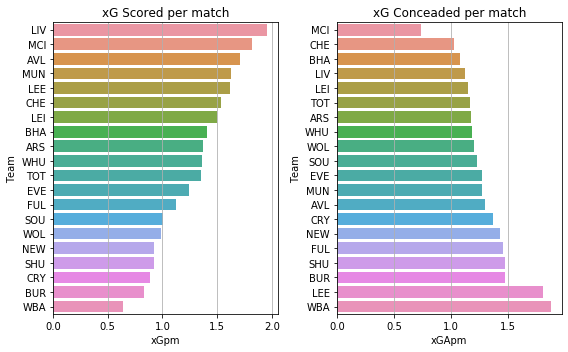

In [17]:
plt.figure(figsize=(8,5))
#plt.suptitle("EPL 2020/21 SEASON UPTO GW4")

plt.subplot(1,2,1)
plt.title("xG Scored per match")
sns.barplot(orient='h', x='xGpm',y='Team',
            data=df_temp.sort_values(by='xGpm',ascending=False))
plt.grid(which='both', axis='x')

plt.subplot(1,2,2)
plt.title("xG Conceaded per match")
sns.barplot(orient='h', x='xGApm',y='Team',
            data=df_temp.sort_values(by='xGApm',ascending=True))
plt.grid(which='both', axis='x')

plt.tight_layout()
plt.savefig('xg_xa.png')
plt.show()

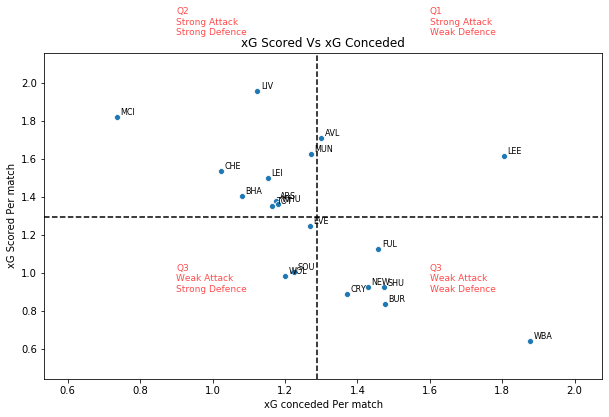

In [18]:
plt.figure(figsize=(10,6))
plt.title("xG Scored Vs xG Conceded")
sns.scatterplot(data=df_temp, x='xGApm', y='xGpm')
for i in range(df_temp.shape[0]):
    plt.text(df_temp.xGApm[i]+0.01, df_temp.xGpm[i]+0.01, 
             df_temp.Team[i], fontdict={'fontsize':8})
plt.xlabel("xG conceded Per match")
plt.ylabel("xG Scored Per match")
#plt.plot([0,3],[0,3],'r--')
plt.xlim(df_temp.xGApm.min()-0.2,df_temp.xGApm.max()+0.2)
plt.ylim(df_temp.xGpm.min()-0.2,df_temp.xGpm.max()+0.2)
plt.axhline(y=df_temp.xGpm.mean(),ls='--', color='k')
plt.axvline(x=df_temp.xGApm.mean(),ls='--', color='k')

plt.text(x=1.6, y=2.25, s="Q1\nStrong Attack\nWeak Defence", 
         alpha=0.7,fontsize=9, color='red')
plt.text(x=0.9, y=2.25, s="Q2\nStrong Attack\nStrong Defence", 
         alpha=0.7,fontsize=9, color='red')
plt.text(x=0.9, y=0.9, s="Q3\nWeak Attack\nStrong Defence", 
         alpha=0.7,fontsize=9, color='red')
plt.text(x=1.6, y=0.9, s="Q3\nWeak Attack\nWeak Defence", 
         alpha=0.7,fontsize=9, color='red')

plt.savefig('scatter_xg_xa.png')
plt.show()

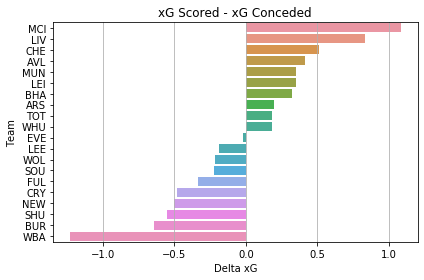

In [19]:
plt.figure(figsize=(6,4))
plt.title("xG Scored - xG Conceded")
sns.barplot(orient='h', x='delta_xGpm',y='Team', 
            data=df_temp.sort_values(by='delta_xGpm', ascending=False))
plt.grid(which='both', axis='x')
plt.xlabel('Delta xG')
plt.tight_layout()
plt.savefig('delta_xg.png')
plt.show()

### Prediction

In [20]:
df_fix=df[df.GW>gw_last].iloc[:,:3].reset_index()

def predict_xg(df_fix):
    df_fix['G_home']=0.0
    df_fix['G_away']=0.0

    for i in range(df_fix.shape[0]):
        df_fix.G_home[i]=(df_temp.xGpm[df_temp.Team==df_fix.Home[i]].sum()+
                       df_temp.xGApm[df_temp.Team==df_fix.Away[i]].sum())/2
        df_fix.G_away[i]=(df_temp.xGpm[df_temp.Team==df_fix.Away[i]].sum()+
                       df_temp.xGApm[df_temp.Team==df_fix.Home[i]].sum())/2

    df_fix['GD']=df_fix['G_home']-df_fix['G_away']
    df_fix['GS']=df_fix['G_home']+df_fix['G_away']
    df_fix=df_fix.sort_values(by='GD', ascending=False)
    return df_fix

df_fix=predict_xg(df_fix)

df_styled=df_fix.iloc[:,1:][df_fix.GW==gw_next].style.background_gradient(cmap='RdYlGn',subset=['GD','GS']).hide_index()
dfi.export(df_styled,"mytable.png")
df_styled

GW,Home,Away,G_home,G_away,GD,GS
22,SHU,WBA,1.399459,1.057792,0.341667,2.457251
22,MUN,SOU,1.424405,1.138214,0.286190,2.562619
22,LIV,BHA,1.519048,1.264286,0.254762,2.783333
22,AVL,WHU,1.445739,1.330952,0.114787,2.776692
22,NEW,CRY,1.147619,1.159524,-0.011905,2.307143
22,LEE,EVE,1.441711,1.526184,-0.084474,2.967895
22,TOT,CHE,1.186905,1.349167,-0.162262,2.536071
22,WOL,ARS,1.080952,1.288095,-0.207143,2.369048
22,FUL,LEI,1.139348,1.478947,-0.339599,2.618296
22,BUR,MCI,0.785000,1.647500,-0.862500,2.432500


### Fixture Difficulty Rating

In [21]:
gw_dict={}
for i in range(1,5):
    gw_dict.update({str("GW"+str(gw_last+i)):gw_last+i})


df_fdr=pd.DataFrame({'Team':df_temp.Team})

for GW in gw_dict.keys():
    temp_df=df_fix[df_fix.GW==gw_dict[GW]]

    df_fdr[GW]=df_fdr.Team\
    .apply(lambda x:(temp_df[temp_df.Home==x].GD.sum()) 
           if x in (temp_df.Home.unique()) 
           else -temp_df[temp_df.Away==x].GD.sum())
    
sc=MinMaxScaler()
df_fdr['Mean']=df_fdr.mean(axis=1)
for col in gw_dict.keys():
    df_fdr[col]=sc.fit_transform(np.array(df_fdr[col]).reshape(-1,1))
df_fdr=df_fdr.sort_values(by='Mean', ascending=False)
df_fdr.style.background_gradient(cmap='RdYlGn',
                                 subset=list(gw_dict.keys()))

,Team,GW22,GW23,GW24,GW25,Mean
13,MCI,1.000000,0.588719,0.783784,1.000000,0.470208
15,MUN,0.665908,0.631645,1.000000,0.984262,0.423584
6,CHE,0.594065,0.873510,0.819820,0.912160,0.390982
4,LIV,0.647688,0.411281,0.653153,0.982704,0.199745
14,BHA,0.352312,0.839768,0.472657,0.954668,0.146541
9,WHU,0.433457,0.680681,0.730480,0.497713,0.126233
2,LEI,0.696869,0.698086,0.346847,0.464459,0.086560
1,AVL,0.566543,0.574216,0.527343,0.535541,0.073716
5,TOT,0.405935,1.000000,0.216216,0.502287,0.024732
7,LEE,0.451030,0.602568,0.377027,0.513721,-0.030464


In [22]:
df_result=pd.read_csv("EPL_result.csv")
df_result=df_result[df_result.GW==gw_next]

#Name Preprocess
df_result.Home=df_result.Home.apply(lambda x: team_abb[x])
df_result.Away=df_result.Away.apply(lambda x: team_abb[x])

df_result['Match']=df_result.Home+" Vs "+df_result.Away
df_result["act_GD"]=df_result.G_Home-df_result.G_Away
df_result["act_xGD"]=df_result.xG_Home-df_result.xG_Away
df_result["pred_xG_Home"]=df_result.Home\
.apply(lambda x:df_fix.G_home[df_fix.Home==x][df_fix.GW==gw_next].sum())
df_result["pred_xG_Away"]=df_result.Home\
.apply(lambda x:df_fix.G_away[df_fix.Home==x][df_fix.GW==gw_next].sum())
df_result["pred_xGD"]=df_result.Home\
.apply(lambda x:df_fix.GD[df_fix.Home==x][df_fix.GW==gw_next].sum())
df_result['xG_diff']=abs(df_result.pred_xGD-df_result.act_xGD)
df_result['abs_pred_xGD']=abs(df_result.pred_xGD)
df_result.sort_values(by='abs_pred_xGD', ascending=False, inplace=True)
df_result

,GW,Home,Away,xG_Home,xG_Away,G_Home,G_Away,Match,act_GD,act_xGD,pred_xG_Home,pred_xG_Away,pred_xGD,xG_diff,abs_pred_xGD
205,22,BUR,MCI,NaN,NaN,NaN,NaN,BUR Vs MCI,NaN,NaN,0.785000,1.647500,-0.862500,NaN,0.862500
206,22,SHU,WBA,NaN,NaN,NaN,NaN,SHU Vs WBA,NaN,NaN,1.399459,1.057792,0.341667,NaN,0.341667
209,22,FUL,LEI,NaN,NaN,NaN,NaN,FUL Vs LEI,NaN,NaN,1.139348,1.478947,-0.339599,NaN,0.339599
211,22,MUN,SOU,NaN,NaN,NaN,NaN,MUN Vs SOU,NaN,NaN,1.424405,1.138214,0.286190,NaN,0.286190
214,22,LIV,BHA,NaN,NaN,NaN,NaN,LIV Vs BHA,NaN,NaN,1.519048,1.264286,0.254762,NaN,0.254762
208,22,WOL,ARS,NaN,NaN,NaN,NaN,WOL Vs ARS,NaN,NaN,1.080952,1.288095,-0.207143,NaN,0.207143
213,22,TOT,CHE,NaN,NaN,NaN,NaN,TOT Vs CHE,NaN,NaN,1.186905,1.349167,-0.162262,NaN,0.162262
210,22,AVL,WHU,NaN,NaN,NaN,NaN,AVL Vs WHU,NaN,NaN,1.445739,1.330952,0.114787,NaN,0.114787
207,22,LEE,EVE,NaN,NaN,NaN,NaN,LEE Vs EVE,NaN,NaN,1.441711,1.526184,-0.084474,NaN,0.084474
212,22,NEW,CRY,NaN,NaN,NaN,NaN,NEW Vs CRY,NaN,NaN,1.147619,1.159524,-0.011905,NaN,0.011905


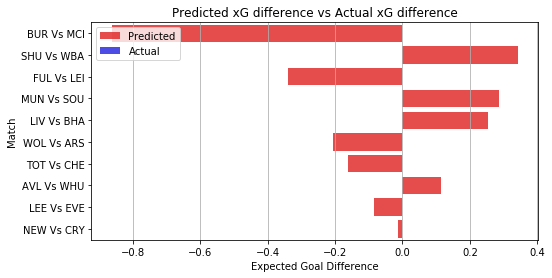

In [23]:
plt.figure(figsize=(8,4))
plt.title("Predicted xG difference vs Actual xG difference")
sns.barplot(y='Match', x='pred_xGD', orient='h',data=df_result, color='red', alpha=0.8
            , label="Predicted")
sns.barplot(y='Match', x='act_xGD', orient='h', data=df_result, color='blue', alpha=0.8
            , label="Actual")
plt.xlabel("Expected Goal Difference")
#plt.xticks(rotation=90)
plt.legend(loc="upper left")
plt.grid(axis='x')
plt.savefig('pred_vs_act_gw19.png')
plt.show()

In [24]:
df_fix[df_fix.GD>0.4]


,index,GW,Home,Away,G_home,G_away,GD,GS
87,292,30,CHE,WBA,1.704762,0.833333,0.871429,2.538095
111,316,33,AVL,WBA,1.793358,0.971429,0.821930,2.764787
108,313,32,LEI,WBA,1.688095,0.897619,0.790476,2.585714
136,341,35,ARS,WBA,1.626190,0.909524,0.716667,2.535714
16,221,23,TOT,WBA,1.613095,0.903929,0.709167,2.517024
113,318,33,LIV,NEW,1.692857,1.023810,0.669048,2.716667
169,374,38,LIV,CRY,1.664286,1.007143,0.657143,2.671429
112,317,33,MCI,SOU,1.522500,0.870000,0.652500,2.392500
77,282,29,MCI,WOL,1.510000,0.860357,0.649643,2.370357
96,301,31,MCI,LEE,1.812500,1.175000,0.637500,2.987500


In [96]:
df=df_temp[['Team','M','P','GD','G','GA' ]].sort_values(by=['P','GD'],ascending=False).head(6).reset_index(drop=True)
df
dfi.export(df,"blog_1.png")

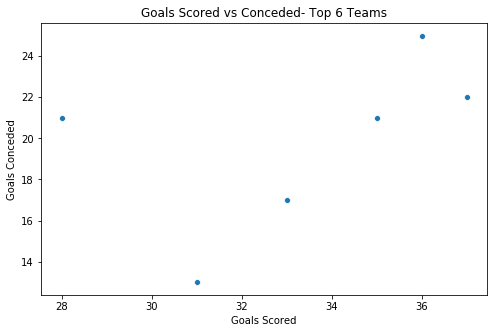

In [97]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df,x='G',y='GA')

plt.title("Goals Scored vs Conceded- Top 6 Teams") #title
plt.xlabel("Goals Scored")                         #x label
plt.ylabel("Goals Conceded")                       #y label
plt.show()

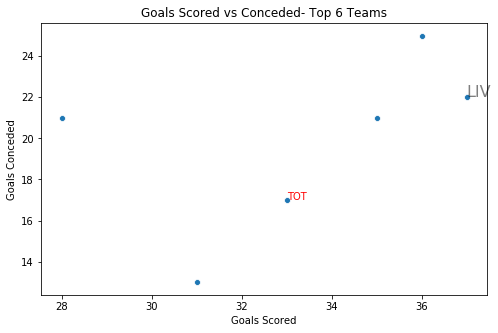

In [98]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df,x='G',y='GA')

plt.text(df.G[df.Team=='TOT'],df.GA[df.Team=='TOT'],"TOT", color='red')
plt.text(df.G[df.Team=='LIV'],df.GA[df.Team=='LIV'],"LIV", 
         fontdict=dict(color='black', alpha=0.5, size=16))

plt.title("Goals Scored vs Conceded- Top 6 Teams") #title
plt.xlabel("Goals Scored")                         #x label
plt.ylabel("Goals Conceded")                       #y label
plt.savefig("blog_3.png")
plt.show()

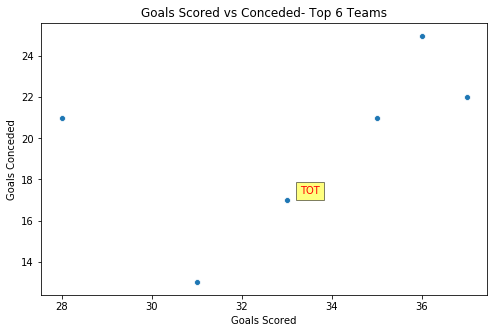

In [99]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df,x='G',y='GA')
plt.text(x=df.G[df.Team=='TOT']+0.3,y=df.GA[df.Team=='TOT']+0.3,s="TOT",
         fontdict=dict(color='red',size=10),
         bbox=dict(facecolor='yellow',alpha=0.5))

plt.title("Goals Scored vs Conceded- Top 6 Teams") #title
plt.xlabel("Goals Scored")                         #x label
plt.ylabel("Goals Conceded")                       #y label
plt.savefig("blog_4.png")
plt.show()

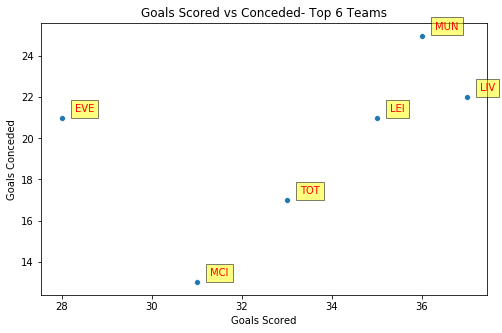

In [100]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df,x='G',y='GA')

for i in range(df.shape[0]):
    plt.text(x=df.G[i]+0.3,y=df.GA[i]+0.3,s=df.Team[i], 
             fontdict=dict(color='red',size=10),
             bbox=dict(facecolor='yellow',alpha=0.5))
    
plt.title("Goals Scored vs Conceded- Top 6 Teams") #title
plt.xlabel("Goals Scored")    #x label
plt.ylabel("Goals Conceded")  #y label
plt.savefig("blog_5.png")
plt.show()

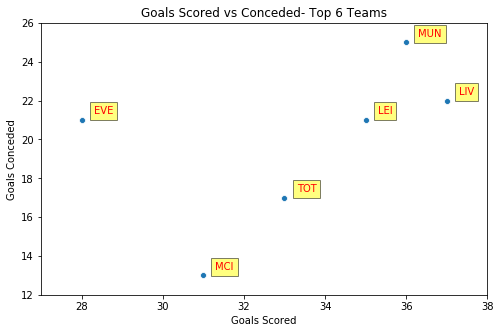

In [101]:
plt.figure(figsize=(8,5))

sns.scatterplot(data=df,x='G',y='GA')
for i in range(df.shape[0]):
    plt.text(x=df.G[i]+0.3,y=df.GA[i]+0.3,s=df.Team[i], 
             fontdict=dict(color='red',size=10),
             bbox=dict(facecolor='yellow',alpha=0.5))

plt.xlim(df.G.min()-1,df.G.max()+1)                #set x limit
plt.ylim(df.GA.min()-1,df.GA.max()+1)              #set y limit

plt.title("Goals Scored vs Conceded- Top 6 Teams") #title
plt.xlabel("Goals Scored")                         #x label
plt.ylabel("Goals Conceded")                       #y label
plt.savefig("blog_6.png")
plt.show()

In [102]:
rec=df.to_dict('records')

In [103]:
rec

[{'Team': 'MUN', 'M': 19, 'P': 40, 'GD': 11.0, 'G': 36.0, 'GA': 25.0},
 {'Team': 'MCI', 'M': 18, 'P': 38, 'GD': 18.0, 'G': 31.0, 'GA': 13.0},
 {'Team': 'LEI', 'M': 19, 'P': 38, 'GD': 14.0, 'G': 35.0, 'GA': 21.0},
 {'Team': 'LIV', 'M': 19, 'P': 34, 'GD': 15.0, 'G': 37.0, 'GA': 22.0},
 {'Team': 'TOT', 'M': 18, 'P': 33, 'GD': 16.0, 'G': 33.0, 'GA': 17.0},
 {'Team': 'EVE', 'M': 17, 'P': 32, 'GD': 7.0, 'G': 28.0, 'GA': 21.0}]

In [104]:
df_1=pd.DataFrame(rec)
df_1

,Team,M,P,GD,G,GA
0,MUN,19,40,11.0,36.0,25.0
1,MCI,18,38,18.0,31.0,13.0
2,LEI,19,38,14.0,35.0,21.0
3,LIV,19,34,15.0,37.0,22.0
4,TOT,18,33,16.0,33.0,17.0
5,EVE,17,32,7.0,28.0,21.0


In [106]:
df_1=pd.DataFrame(rec)
df_1

,Team,M,P,GD,G,GA
0,MUN,19,40,11.0,36.0,25.0
1,MCI,18,38,18.0,31.0,13.0
2,LEI,19,38,14.0,35.0,21.0
3,LIV,19,34,15.0,37.0,22.0
4,TOT,18,33,16.0,33.0,17.0
5,EVE,17,32,7.0,28.0,21.0
